# COGS 118C Final Project

## Preprocessing

### Setup

In [2]:
import numpy as np
import pandas as pd
import mne
import matplotlib.pyplot as plt
import scipy
import matplotlib
from scipy.io import wavfile
import picard

### Read Data

In [3]:
sub1_set = 'data/subject1/sub-01_task-songfamiliarity_eeg.set'

# Read the raw data
raw = mne.io.read_raw_eeglab(sub1_set, preload=True)
raw.info

Reading /Users/gregoryweber/Documents/cogs-118c-song-familiarity/data/subject1/sub-01_task-songfamiliarity_eeg.fdt
Reading 0 ... 1807099  =      0.000 ...  1807.099 secs...


<Info | 8 non-empty values
 bads: []
 ch_names: Fp1, F3, F7, FC5, FC1, FCz, C3, T7, TP9, CP5, CP1, Pz, P3, P7, ...
 chs: 32 EEG
 custom_ref_applied: False
 dig: 35 items (3 Cardinal, 32 EEG)
 highpass: 0.0 Hz
 lowpass: 500.0 Hz
 meas_date: unspecified
 nchan: 32
 projs: []
 sfreq: 1000.0 Hz
>

### Set Electrode Locations

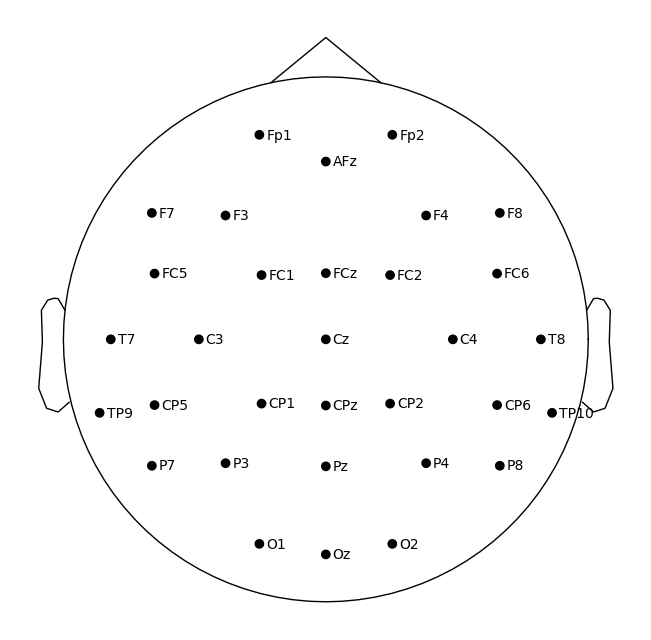

In [5]:
#Setting electrode locations
montage = 'easycap-M1'
file = raw.set_montage(montage)
a = file.plot_sensors(show_names= True)

### Filter Data

In [6]:
# Apply a band pass filter and plot the first 5 seconds of data
file_filt = file.filter(0.1, 50, fir_design='firwin')
file_filt.info

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 33001 samples (33.001 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.6s


<Info | 8 non-empty values
 bads: []
 ch_names: Fp1, F3, F7, FC5, FC1, FCz, C3, T7, TP9, CP5, CP1, Pz, P3, P7, ...
 chs: 32 EEG
 custom_ref_applied: False
 dig: 35 items (3 Cardinal, 32 EEG)
 highpass: 0.1 Hz
 lowpass: 50.0 Hz
 meas_date: unspecified
 nchan: 32
 projs: []
 sfreq: 1000.0 Hz
>

### Reference data to mastoids TP9 and TP10

In [7]:
file_filt_ref = file_filt.set_eeg_reference(ref_channels=['TP9', 'TP10'])

EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.


### Drop mastoids and run ICA on data

In [8]:
components = 0.99
method_p = 'picard'
max_itert = 100
fit_param = dict(fastica_it=5)
random_state_number = 42
ica = mne.preprocessing.ICA(n_components=components, method=method_p, max_iter=max_itert, fit_params=fit_param, random_state=random_state_number)
file_ica = ica.fit(file_filt_ref)

Fitting ICA to data using 32 channels (please be patient, this may take a while)
Selecting by explained variance: 22 components
Fitting ICA took 23.6s.


### Saving Data in File

In [10]:
file_ica.save('sub01_preprocessed-ica.fif', overwrite=True)

Writing ICA solution to /Users/gregoryweber/Documents/cogs-118c-song-familiarity/sub01_preprocessed-ica.fif...


Method,picard
Fit parameters,fastica_it=5max_iter=100
Fit,46 iterations on raw data (1807100 samples)
ICA components,22
Available PCA components,32
Channel types,eeg
ICA components marked for exclusion,—


## Data Analysis

### Analyze Recognized Song vs. Noise in One Subject

In [12]:
# graph a recognized song vs noise in time domain

In [ ]:
# graph the power spectral density of a recognized song vs noise

In [ ]:
# do a spectrogram of a recognized song vs noise

### Analyze Recognized Song vs. Unrecognized Song

In [ ]:
# graph a recognized song vs unrecognized in time domain

In [ ]:
# graph the power spectral density of a recognized song vs unrecognized

In [ ]:
# do a spectrogram of a recognized song vs unrecognized